In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Daten laden
df = pd.read_csv('../data/raw/OnlineRetail.csv', encoding='ISO-8859-1')

print("=" * 60)
print("ORIGINAL DATASET")
print("=" * 60)
print(f"Shape: {df.shape}")
print(f"\nErste Zeihlen:")
print(df.head(5))
print(f"\nDatentypen:")
print(df.dtypes)
print(f"\nFehlende Werte:")
print(df.isnull().sum())
print("Statitische Eigenschaften:")
print(df.describe())

ORIGINAL DATASET
Shape: (541909, 8)

Erste Zeihlen:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Datentypen:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID

In [3]:
# Datenbereinigung
print("\n" + "=" * 60)
print("DATENBEREINIGUNG")
print("=" * 60)

# Fehlende CustomerID entfernen
df_clean = df.dropna(subset=['CustomerID'])
print(f"Nach Entfernung fehlender CustomerID: {df_clean.shape[0]} Zeilen")

# Fehlende Description entfernen
df_clean=df_clean.dropna(subset=['Description'])
print(f"Nach Entfernung fehlender Description: {df_clean.shape[0]} Zeilen")

# Negative Werte entfernen
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
print(f"Nach Entfernung negativer Werte: {df_clean.shape[0]} Zeilen")

# Duplikate entfernen
df_clean = df_clean.drop_duplicates()
print(f"Nach Entfernung Duplikate: {df_clean.shape[0]} Zeilen")

# InvoiceDate in datetime umwandeln
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

print(f"\n" + "=" * 60)
print("BEREINIGTE DATEN")
print("=" * 60)
print(f"Finale Shape: {df_clean.shape}")
print(f"Anzahl einzigartiger Kunden: {df_clean['CustomerID'].nunique()}")
print(f"Zeitraum: {df_clean['InvoiceDate'].min()} bis {df_clean['InvoiceDate'].max()}")

print(f"\nErste Zeilen der bereinigten Daten:")
print(df_clean.head(10))



DATENBEREINIGUNG
Nach Entfernung fehlender CustomerID: 406829 Zeilen
Nach Entfernung fehlender Description: 406829 Zeilen
Nach Entfernung negativer Werte: 397884 Zeilen
Nach Entfernung Duplikate: 392692 Zeilen

BEREINIGTE DATEN
Finale Shape: (392692, 8)
Anzahl einzigartiger Kunden: 4338
Zeitraum: 2010-12-01 08:26:00 bis 2011-12-09 12:50:00

Erste Zeilen der bereinigten Daten:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WAR

In [4]:
# RFM-Analyse durchführen
print("=" * 60)
print("RFM FEATURE ENGINEERING")
print("=" * 60)

# Referenzdatum: Das DAtum nach letztem Kauf
reference_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Referenzdatum: {reference_date}\n")

# Berechne Gesamtbetrag
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# RFM pro Kunde aggregieren
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
}).reset_index()

# Spalten umbenennen
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print("RFM Daten erstellt!")
print(f"Shape: {rfm.shape}")
print(f"\nErste 10 Kunden:")
print(rfm.head(10))

print("\n" + "=" * 60)
print("RFM STATISTIKEN")
print("=" * 60)
print(rfm.describe())

print("\n" + "=" * 60)
print("RFM VERTEILUNGEN")
print("=" * 60)
print(f"Recency (Tage seit letztem Kauf):")
print(f"  - Min:    {rfm['Recency'].min()} Tage")
print(f"  - Max:    {rfm['Recency'].max()} Tage")
print(f"  - Median: {rfm['Recency'].median():.0f} Tage")

print(f"\nFrequency (Anzahl Bestellungen):")
print(f"  - Min:    {rfm['Frequency'].min()}")
print(f"  - Max:    {rfm['Frequency'].max()}")
print(f"  - Median: {rfm['Frequency'].median():.0f}")

print(f"\nMonetary (Gesamtumsatz):")
print(f"  - Min:    £{rfm['Monetary'].min():.2f}")
print(f"  - Max:    £{rfm['Monetary'].max():.2f}")
print(f"  - Median: £{rfm['Monetary'].median():.2f}")



RFM FEATURE ENGINEERING
Referenzdatum: 2011-12-10 12:50:00

RFM Daten erstellt!
Shape: (4338, 4)

Erste 10 Kunden:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40
5     12352.0       36          8   2506.04
6     12353.0      204          1     89.00
7     12354.0      232          1   1079.40
8     12355.0      214          1    459.40
9     12356.0       23          3   2811.43

RFM STATISTIKEN
         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2048.688081
std     1721.808492   100.014169     7.697998    8985.230220
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     306.482500
50%    15299.50000

EXPLORATIVE DATENANALYSE (EDA)


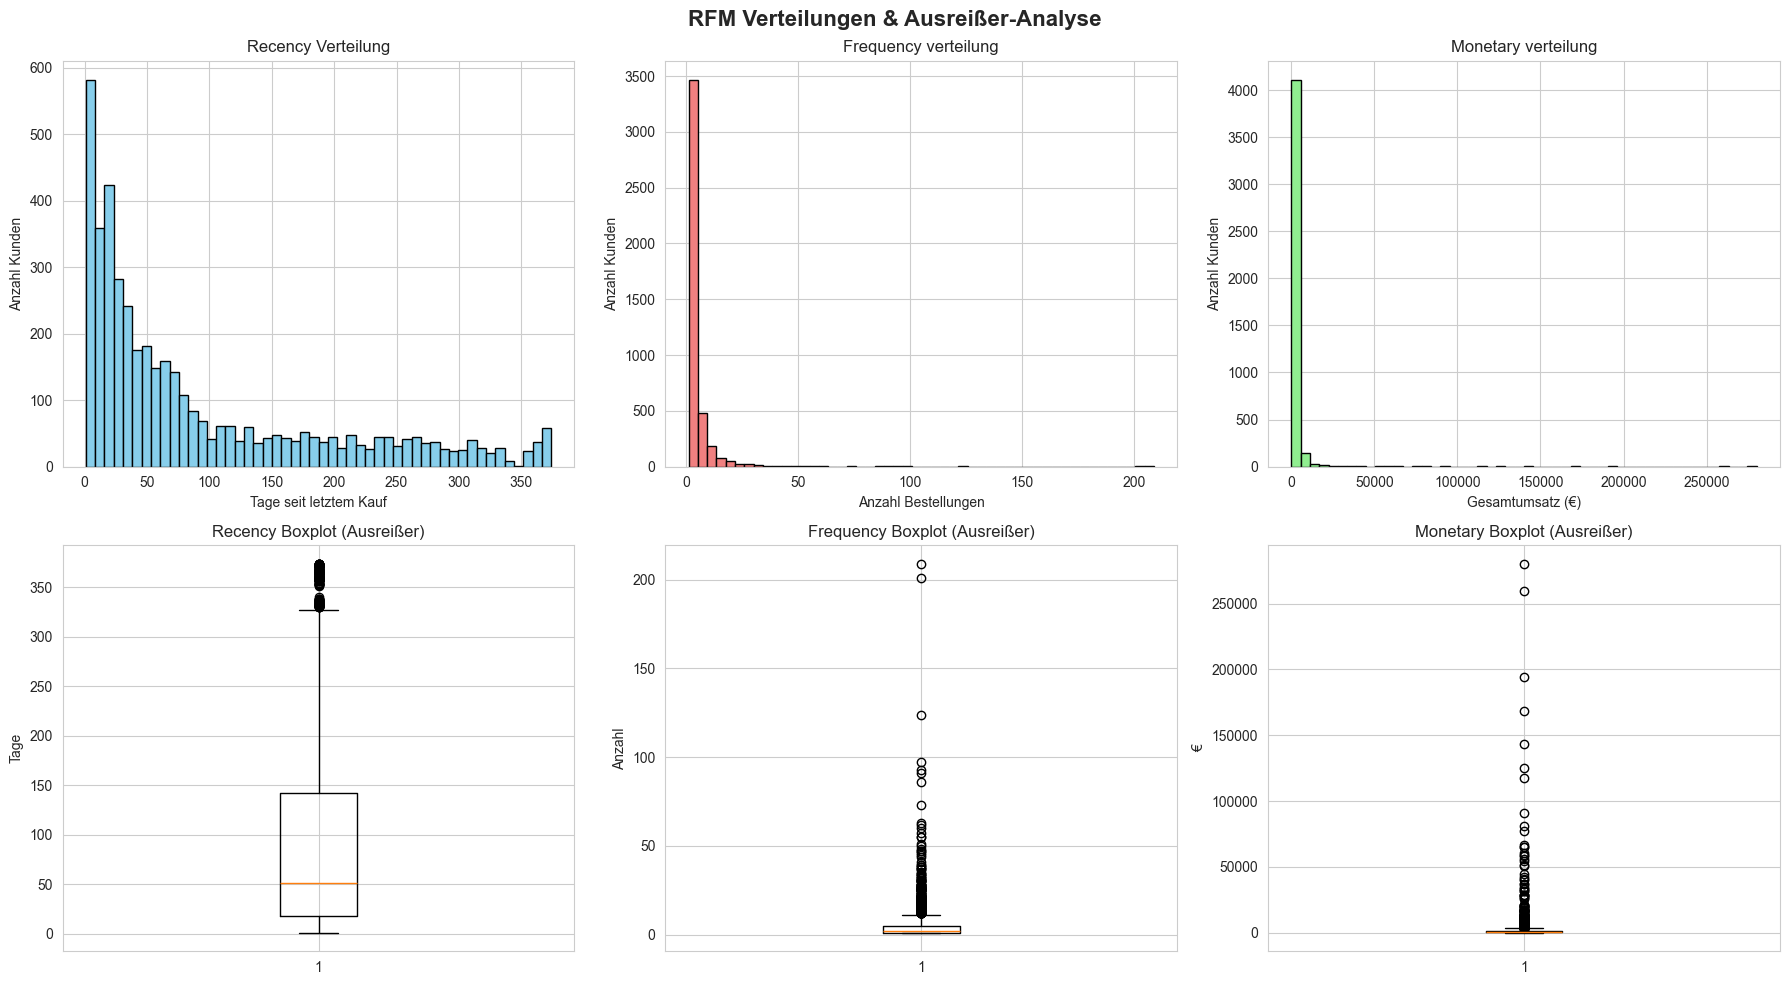

Plot gespeichert



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
print("=" * 60)
print("EXPLORATIVE DATENANALYSE (EDA)")
print("=" * 60)

# Verteilungen plotten
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('RFM Verteilungen & Ausreißer-Analyse', fontsize=16, fontweight='bold')

# Recency
axes[0, 0].hist(rfm['Recency'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Recency Verteilung')
axes[0, 0].set_xlabel('Tage seit letztem Kauf')
axes[0, 0].set_ylabel('Anzahl Kunden')

# Frequency
axes[0, 1].hist(rfm['Frequency'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Frequency verteilung')
axes[0, 1].set_xlabel('Anzahl Bestellungen')
axes[0, 1].set_ylabel('Anzahl Kunden')

# Monetary
axes[0, 2].hist(rfm['Monetary'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Monetary verteilung')
axes[0, 2].set_xlabel('Gesamtumsatz (€)')
axes[0, 2].set_ylabel('Anzahl Kunden')

# Boxplots für Ausreißer
axes[1, 0].boxplot(rfm['Recency'])
axes[1, 0].set_title('Recency Boxplot (Ausreißer)')
axes[1, 0].set_ylabel('Tage')

axes[1, 1].boxplot(rfm['Frequency'])
axes[1, 1].set_title('Frequency Boxplot (Ausreißer)')
axes[1, 1].set_ylabel('Anzahl')

axes[1, 2].boxplot(rfm['Monetary'])
axes[1, 2].set_title('Monetary Boxplot (Ausreißer)')
axes[1,2].set_ylabel('€')

plt.tight_layout()
plt.savefig('../results/figures_optics/01_rfm_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("Plot gespeichert\n")

In [6]:
#  Schiefe (Skewness) berechnen
print("=" * 60)
print("SCHIEFE DER VERTEILUNGEN (Skewness)")
print("=" * 60)
print(f"Recency:  {rfm['Recency'].skew():.2f}")
print(f"Frequency: {rfm['Frequency'].skew():.2f}")
print(f"Monetary:  {rfm['Monetary'].skew():.2f}")
print("\nHohe Schiefe (>1) bedeutet: Log-Transformation nötig!")

SCHIEFE DER VERTEILUNGEN (Skewness)
Recency:  1.25
Frequency: 12.07
Monetary:  19.34

Hohe Schiefe (>1) bedeutet: Log-Transformation nötig!


In [8]:
# Ausreißer identifizieren (IQR-Methode)
print("\n" + "=" * 60)
print("AUSREISSER ANALYSE (IQR-Methode)")
print("=" * 60)

for col in ['Recency', 'Frequency', 'Monetary']:
    Q1 = rfm[col].quantile(0.25)
    Q3 = rfm[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = rfm[(rfm[col] < lower_bound) | (rfm[col] > upper_bound)]
    
    print(f"\n{col}:")
    print(f"  - IQR: {IQR:.2f}")
    print(f"  - Untere Grenze: {lower_bound:.2f}")
    print(f"  - Obere Grenze: {upper_bound:.2f}")
    print(f"  - Anzahl Ausreißer: {len(outliers)} ({len(outliers)/len(rfm)*100:.1f}%)")



AUSREISSER ANALYSE (IQR-Methode)

Recency:
  - IQR: 124.00
  - Untere Grenze: -168.00
  - Obere Grenze: 328.00
  - Anzahl Ausreißer: 155 (3.6%)

Frequency:
  - IQR: 4.00
  - Untere Grenze: -5.00
  - Obere Grenze: 11.00
  - Anzahl Ausreißer: 285 (6.6%)

Monetary:
  - IQR: 1354.11
  - Untere Grenze: -1724.69
  - Obere Grenze: 3691.77
  - Anzahl Ausreißer: 425 (9.8%)



KORRELATIONEN
            Recency  Frequency  Monetary
Recency    1.000000  -0.260578 -0.121831
Frequency -0.260578   1.000000  0.552780
Monetary  -0.121831   0.552780  1.000000


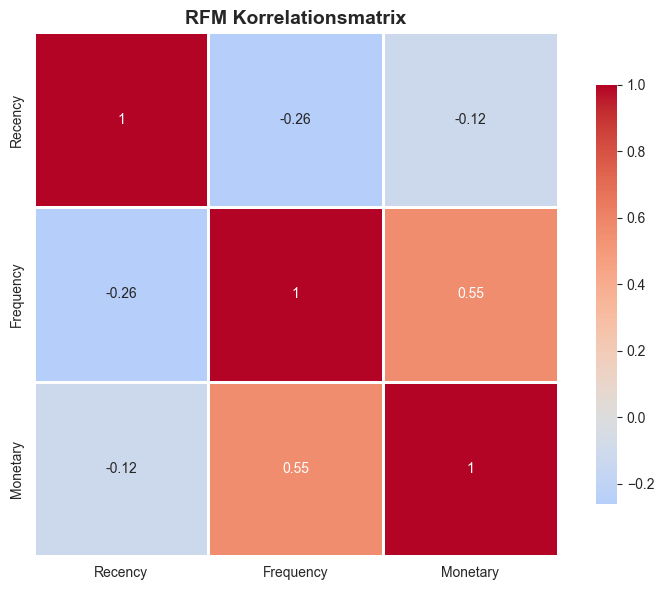


✓ Plot gespeichert: 02_rfm_correlation.png


In [9]:
#  Korrelationsmatrix
print("\n" + "=" * 60)
print("KORRELATIONEN")
print("=" * 60)
correlation = rfm[['Recency', 'Frequency', 'Monetary']].corr()
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('RFM Korrelationsmatrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/02_rfm_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plot gespeichert: 02_rfm_correlation.png")

TRANSFORMATION & SKALIERUNG
Log-Transformation durchgeführt

NEUE SCHIEFE nach Log-Transformation:
----------------------------------------
Recency_log:  -0.38
Frequency_log: 1.21
Monetary_log:  0.40
Viel besser! Schiefe deutlich reduziert!

STANDARDISIERUNG (StandardScaler)
Skalierung abgeschlossen
Shape: (4338, 3)

Skalierte Daten - Statistiken:
----------------------------------------
       Recency_scaled  Frequency_scaled  Monetary_scaled
count    4.338000e+03      4.338000e+03     4.338000e+03
mean    -8.025955e-17     -8.189750e-18    -3.669008e-16
std      1.000115e+00      1.000115e+00     1.000115e+00
min     -2.341296e+00     -9.552143e-01    -3.997811e+00
25%     -6.613615e-01     -9.552143e-01    -6.835802e-01
50%      8.992557e-02     -3.615828e-01    -6.510929e-02
75%      8.447915e-01      6.532370e-01     6.572178e-01
max      1.564198e+00      5.858535e+00     4.732381e+00


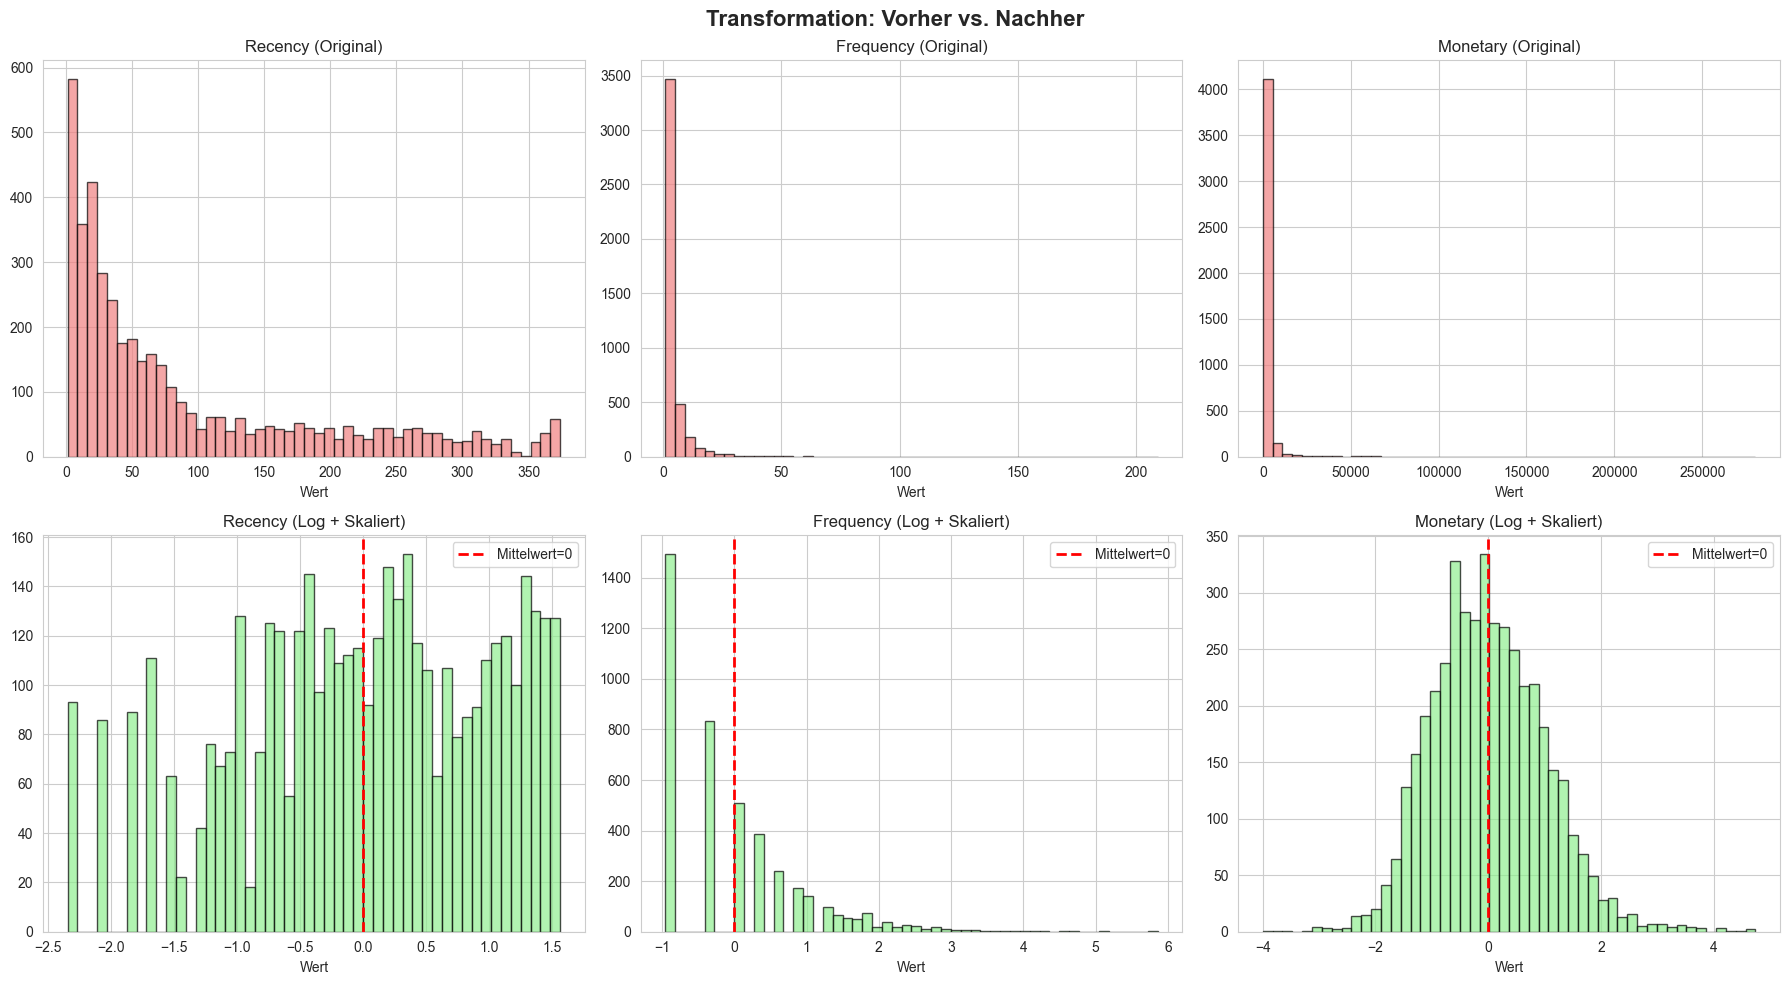


Plot gespeichert: 03_transformation_comparison.png

PHASE 1 ABGESCHLOSSEN!
Daten sind bereit für OPTICS Clustering!
- 4338 Kunden
- 3 Features (Recency, Frequency, Monetary)
- Log-transformiert & standardisiert


In [11]:
from sklearn.preprocessing import StandardScaler

print("=" * 60)
print("TRANSFORMATION & SKALIERUNG")
print("=" * 60)

# Log-Transformation (nur für Frequency und Monetary)
rfm_transformed = rfm.copy()

# Log(x+1) um 0-Werte zu vermeiden
rfm_transformed['Recency_log'] = np.log1p(rfm['Recency'])
rfm_transformed['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm_transformed['Monetary_log'] = np.log1p(rfm['Monetary'])

print("Log-Transformation durchgeführt\n")

# Neue Schiefe prüfen
print("NEUE SCHIEFE nach Log-Transformation:")
print("-" * 40)
print(f"Recency_log:  {rfm_transformed['Recency_log'].skew():.2f}")
print(f"Frequency_log: {rfm_transformed['Frequency_log'].skew():.2f}")
print(f"Monetary_log:  {rfm_transformed['Monetary_log'].skew():.2f}")
print("Viel besser! Schiefe deutlich reduziert!\n")

# Features für Clustering vorbereiten
features_for_clustering = rfm_transformed[['Recency_log', 'Frequency_log', 'Monetary_log']]

print("=" * 60)
print("STANDARDISIERUNG (StandardScaler)")
print("=" * 60)

# StandardScaler anwenden
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(features_for_clustering)

# Als DataFrame speichern
rfm_scaled_df = pd.DataFrame(
    rfm_scaled, 
    columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'],
    index=rfm.index
)

print("Skalierung abgeschlossen")
print(f"Shape: {rfm_scaled_df.shape}\n")

print("Skalierte Daten - Statistiken:")
print("-" * 40)
print(rfm_scaled_df.describe())

# 3. Vergleich vorher/nachher visualisieren
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Transformation: Vorher vs. Nachher', fontsize=16, fontweight='bold')

# Original
axes[0, 0].hist(rfm['Recency'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Recency (Original)')
axes[0, 0].set_xlabel('Wert')

axes[0, 1].hist(rfm['Frequency'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Frequency (Original)')
axes[0, 1].set_xlabel('Wert')

axes[0, 2].hist(rfm['Monetary'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Monetary (Original)')
axes[0, 2].set_xlabel('Wert')

# Transformiert & Skaliert
axes[1, 0].hist(rfm_scaled_df['Recency_scaled'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Recency (Log + Skaliert)')
axes[1, 0].set_xlabel('Wert')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Mittelwert=0')
axes[1, 0].legend()

axes[1, 1].hist(rfm_scaled_df['Frequency_scaled'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Frequency (Log + Skaliert)')
axes[1, 1].set_xlabel('Wert')
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Mittelwert=0')
axes[1, 1].legend()

axes[1, 2].hist(rfm_scaled_df['Monetary_scaled'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Monetary (Log + Skaliert)')
axes[1, 2].set_xlabel('Wert')
axes[1, 2].axvline(0, color='red', linestyle='--', linewidth=2, label='Mittelwert=0')
axes[1, 2].legend()

plt.tight_layout()
plt.savefig('../results/figures/03_transformation_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert: 03_transformation_comparison.png")

print("\n" + "=" * 60)
print("PHASE 1 ABGESCHLOSSEN!")
print("=" * 60)
print("Daten sind bereit für OPTICS Clustering!")
print(f"- {len(rfm)} Kunden")
print(f"- 3 Features (Recency, Frequency, Monetary)")
print(f"- Log-transformiert & standardisiert")

PHASE 2: OPTICS PARAMETER BESTIMMUNG

SCHRITT 1: min_samples festlegen
------------------------------------------------------------
Anzahl Features: 3
Anzahl Datenpunkte: 4338

Empfehlung (2 × Features): 6
Alternative (0.5% der Daten): 21
Alternative (1.0% der Daten): 43

EMPFEHLUNG FÜR min_samples
Wir verwenden: min_samples = 6
Begründung:
  - 2 × Features ist Standard für OPTICS
  - Bei 3 Features = 6 Punkte für dichten Bereich
  - Nicht zu klein (zu viele Noise) oder zu groß (zu wenig Cluster)

SCHRITT 2: K-Distanz Plot für max_eps
------------------------------------------------------------


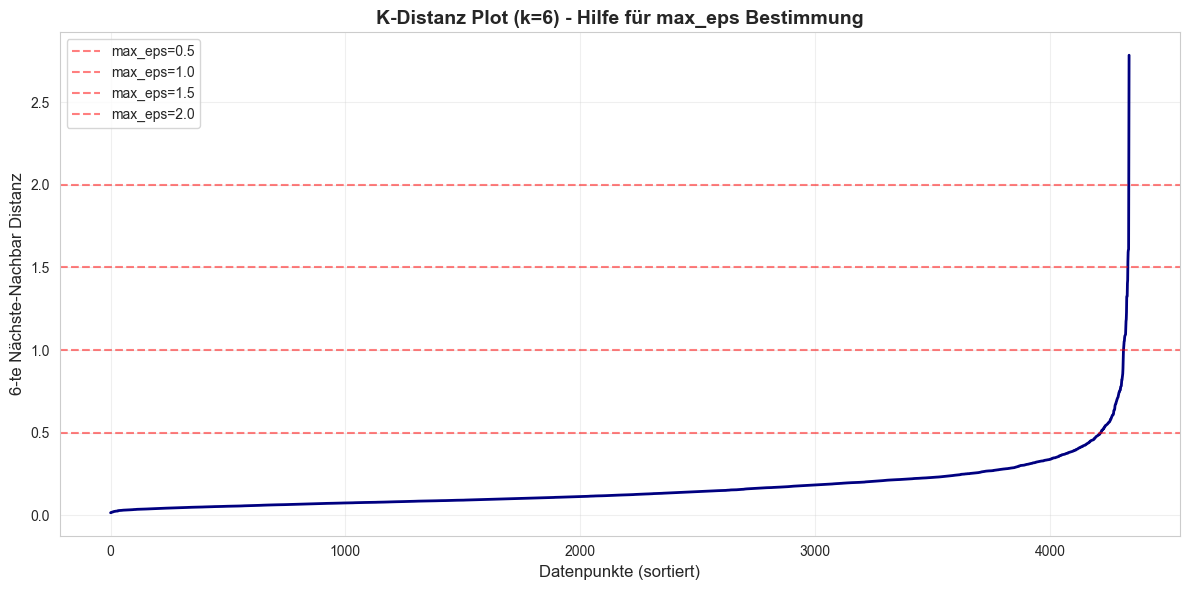

K-Distanz Plot gespeichert: 04_k_distance_plot.png

INTERPRETATION K-DISTANZ PLOT
Suche nach dem 'Ellbogen' (Knick) in der Kurve:
  - Steiler Anstieg am Ende = Ausreißer
  - Flacher Teil davor = dichte Bereiche
  - Der Knickpunkt gibt einen guten max_eps Wert

Distanz-Statistiken:
  - Min:    0.016
  - Median: 0.123
  - Mean:   0.165
  - 75%:    0.206
  - 95%:    0.404
  - Max:    2.783

EMPFEHLUNG FÜR max_eps
Option A: max_eps = None (unbegrenzt)
  -> Gut für erste Analyse
  -> OPTICS findet alle Strukturen

Option B: max_eps basierend auf K-Distanz Plot
  -> Schaue auf den Plot: Wo ist der 'Ellbogen'?
  -> Vorschlag: max_eps = 0.40 (95. Perzentil)

SCHRITT 3: metric wählen
------------------------------------------------------------
Für RFM-Daten empfohlen: metric='euclidean'
  - Standard und gut für kontinuierliche Features


In [12]:
from sklearn.cluster import OPTICS
from sklearn.neighbors import NearestNeighbors

print("=" * 60)
print("PHASE 2: OPTICS PARAMETER BESTIMMUNG")
print("=" * 60)

# 1. min_samples bestimmen
print("\nSCHRITT 1: min_samples festlegen")
print("-" * 60)

n_features = rfm_scaled_df.shape[1]
n_samples = len(rfm_scaled_df)

print(f"Anzahl Features: {n_features}")
print(f"Anzahl Datenpunkte: {n_samples}")

# Empfehlung: 2 * Anzahl Features
min_samples_recommended = 2 * n_features
print(f"\nEmpfehlung (2 × Features): {min_samples_recommended}")

# Alternative: 0.5-1% der Datenmenge
min_samples_percent_05 = int(0.005 * n_samples)
min_samples_percent_10 = int(0.01 * n_samples)

print(f"Alternative (0.5% der Daten): {min_samples_percent_05}")
print(f"Alternative (1.0% der Daten): {min_samples_percent_10}")

print("\n" + "=" * 60)
print("EMPFEHLUNG FÜR min_samples")
print("=" * 60)
print(f"Wir verwenden: min_samples = {min_samples_recommended}")
print("Begründung:")
print("  - 2 × Features ist Standard für OPTICS")
print("  - Bei 3 Features = 6 Punkte für dichten Bereich")
print("  - Nicht zu klein (zu viele Noise) oder zu groß (zu wenig Cluster)")

# 2. K-Distanz Plot erstellen (hilft bei max_eps Bestimmung)
print("\nSCHRITT 2: K-Distanz Plot für max_eps")
print("-" * 60)

# Berechne K-Distanzen
k = min_samples_recommended
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(rfm_scaled_df)
distances, indices = neighbors_fit.kneighbors(rfm_scaled_df)

# Sortiere Distanzen
distances = np.sort(distances[:, k-1], axis=0)

# Plot K-Distanz
plt.figure(figsize=(12, 6))
plt.plot(distances, linewidth=2, color='navy')
plt.title(f'K-Distanz Plot (k={k}) - Hilfe für max_eps Bestimmung', 
          fontsize=14, fontweight='bold')
plt.xlabel('Datenpunkte (sortiert)', fontsize=12)
plt.ylabel(f'{k}-te Nächste-Nachbar Distanz', fontsize=12)
plt.grid(True, alpha=0.3)

# Markiere mögliche max_eps Werte
suggested_eps_values = [0.5, 1.0, 1.5, 2.0]
for eps_val in suggested_eps_values:
    plt.axhline(y=eps_val, color='red', linestyle='--', alpha=0.5, 
                label=f'max_eps={eps_val}')

plt.legend()
plt.tight_layout()
plt.savefig('../results/figures/04_k_distance_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("K-Distanz Plot gespeichert: 04_k_distance_plot.png")

print("\n" + "=" * 60)
print("INTERPRETATION K-DISTANZ PLOT")
print("=" * 60)
print("Suche nach dem 'Ellbogen' (Knick) in der Kurve:")
print("  - Steiler Anstieg am Ende = Ausreißer")
print("  - Flacher Teil davor = dichte Bereiche")
print("  - Der Knickpunkt gibt einen guten max_eps Wert")

# Statistiken der Distanzen
print(f"\nDistanz-Statistiken:")
print(f"  - Min:    {distances.min():.3f}")
print(f"  - Median: {np.median(distances):.3f}")
print(f"  - Mean:   {distances.mean():.3f}")
print(f"  - 75%:    {np.percentile(distances, 75):.3f}")
print(f"  - 95%:    {np.percentile(distances, 95):.3f}")
print(f"  - Max:    {distances.max():.3f}")

print("\n" + "=" * 60)
print("EMPFEHLUNG FÜR max_eps")
print("=" * 60)
print("Option A: max_eps = None (unbegrenzt)")
print("  -> Gut für erste Analyse")
print("  -> OPTICS findet alle Strukturen")
print("\nOption B: max_eps basierend auf K-Distanz Plot")
print("  -> Schaue auf den Plot: Wo ist der 'Ellbogen'?")
print(f"  -> Vorschlag: max_eps = {np.percentile(distances, 95):.2f} (95. Perzentil)")

print("\nSCHRITT 3: metric wählen")
print("-" * 60)
print("Für RFM-Daten empfohlen: metric='euclidean'")
print("  - Standard und gut für kontinuierliche Features")


PHASE 3: OPTICS CLUSTERING

OPTICS PARAMETER:
  - min_samples: 6
  - max_eps: 0.4
  - metric: euclidean

max_eps=2.0 ist großzügig gewählt:
   -> 95% der Distanzen liegen unter 0.40
   -> 2.0 erfasst praktisch alle Punkte
   -> Ausreißer können trotzdem erkannt werden

Trainiere OPTICS Modell...
OPTICS Training abgeschlossen!

REACHABILITY PLOT - DAS HERZSTÜCK VON OPTICS!


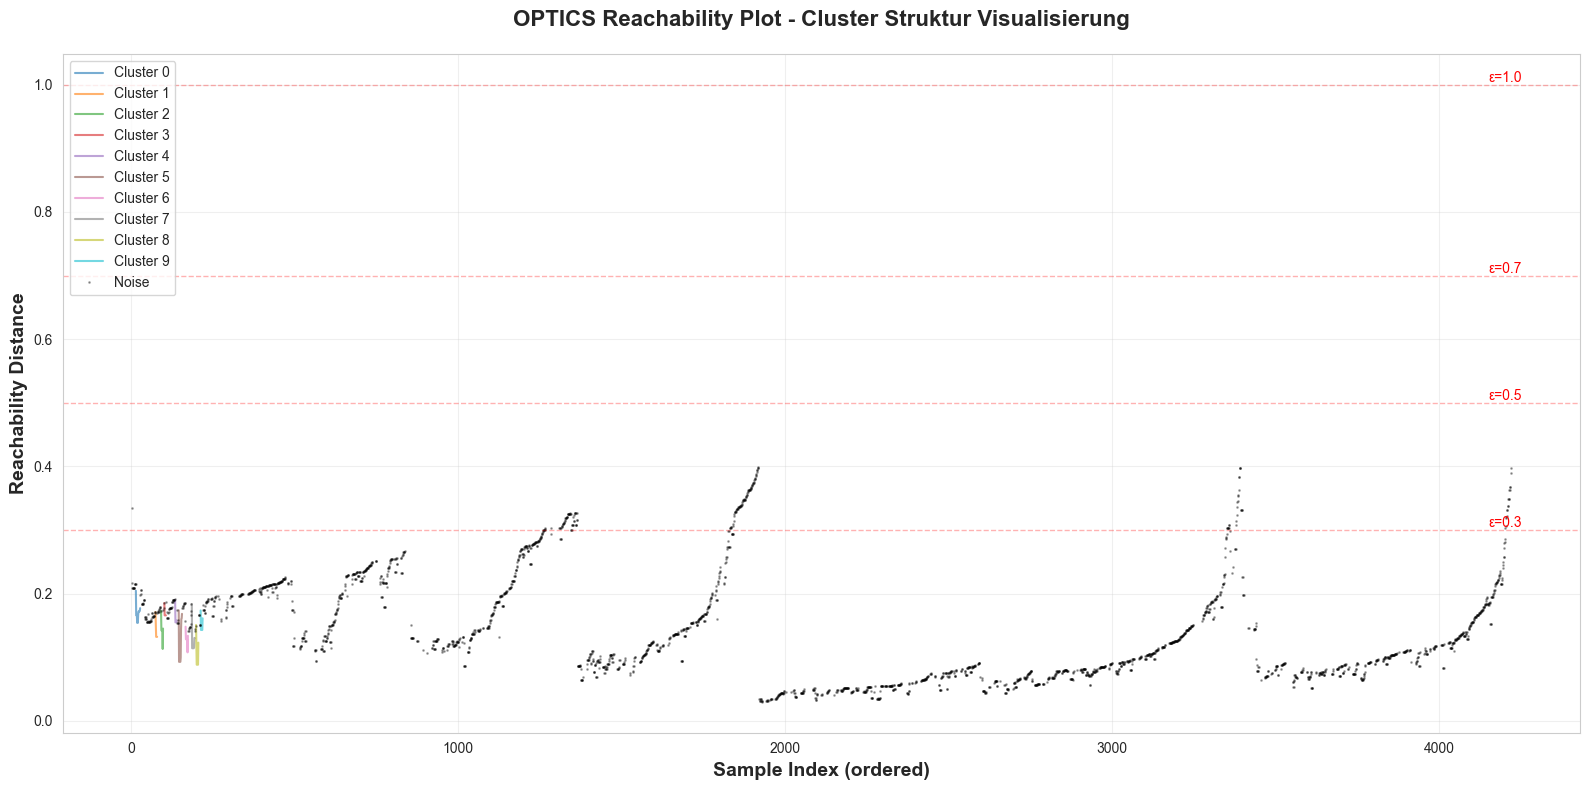

Reachability Plot gespeichert: 05_optics_reachability_plot.png

INTERPRETATION DES REACHABILITY PLOTS:
TÄLER (niedrige Werte) = DICHTE CLUSTER
  -> Punkte, die nah beieinander liegen
  -> Tiefer = dichter zusammen

 SPITZEN (hohe Werte) = AUSREISSER/NOISE
  -> Punkte, die weit von anderen entfernt sind
  -> Höher = isolierter

 HORIZONTALE LINIEN zeigen mögliche Schwellenwerte
  -> Unterhalb der Linie = Cluster
  -> Oberhalb der Linie = Noise

REACHABILITY STATISTIKEN:
Min:    0.0158
Median: 0.1034
Mean:   0.1268
75%:    0.1736
95%:    0.2873
Max:    0.3987
Inf Werte: 124

VORLÄUFIGE CLUSTER-INFO:
Anzahl gefundene Cluster: 165
Anzahl Noise-Punkte: 2853 (65.8%)


In [19]:
import matplotlib.pyplot as plt

print("=" * 60)
print("PHASE 3: OPTICS CLUSTERING")
print("=" * 60)

# Parameter festlegen
min_samples = 6
max_eps = 0.40  # Großzügig gewählt, um alle Strukturen zu erfassen
metric = 'euclidean'

print(f"\nOPTICS PARAMETER:")
print(f"  - min_samples: {min_samples}")
print(f"  - max_eps: {max_eps}")
print(f"  - metric: {metric}")
print(f"\nmax_eps=2.0 ist großzügig gewählt:")
print(f"   -> 95% der Distanzen liegen unter 0.40")
print(f"   -> 2.0 erfasst praktisch alle Punkte")
print(f"   -> Ausreißer können trotzdem erkannt werden")

# OPTICS Modell trainieren
print("\nTrainiere OPTICS Modell...")
optics_model = OPTICS(
    min_samples=min_samples,
    max_eps=max_eps,
    metric=metric,
    n_jobs=-1  # Alle CPU-Kerne nutzen
)

# Fit durchführen
optics_model.fit(rfm_scaled_df)

print("OPTICS Training abgeschlossen!")

# Reachability Distanzen extrahieren
reachability = optics_model.reachability_[optics_model.ordering_]
labels_ordered = optics_model.labels_[optics_model.ordering_]

print("\n" + "=" * 60)
print("REACHABILITY PLOT - DAS HERZSTÜCK VON OPTICS!")
print("=" * 60)

# Reachability Plot erstellen
fig, ax = plt.subplots(figsize=(16, 8))

# Erstelle x-Achse (Sample Indices)
space = np.arange(len(reachability))

# Farben für unterschiedliche Cluster
colors = ['C{}'.format(i) for i in range(10)]
for klass, color in zip(range(0, 10), colors):
    # Boolean Mask für diesen Cluster
    cluster_mask = labels_ordered == klass
    if np.sum(cluster_mask) > 0:
        # Verwende den Mask direkt
        ax.plot(space[cluster_mask], reachability[cluster_mask], color=color, 
                alpha=0.6, linewidth=1.5, label=f'Cluster {klass}')

# Noise separat plotten
noise_mask = labels_ordered == -1
if np.sum(noise_mask) > 0:
    ax.plot(space[noise_mask], reachability[noise_mask], 'k.', 
            alpha=0.3, markersize=2, label='Noise')

ax.set_ylabel('Reachability Distance', fontsize=14, fontweight='bold')
ax.set_xlabel('Sample Index (ordered)', fontsize=14, fontweight='bold')
ax.set_title('OPTICS Reachability Plot - Cluster Struktur Visualisierung', 
             fontsize=16, fontweight='bold', pad=20)

# Referenzlinien für mögliche epsilon Schwellenwerte
for eps_val in [0.3, 0.5, 0.7, 1.0]:
    ax.axhline(y=eps_val, color='red', linestyle='--', alpha=0.3, linewidth=1)
    ax.text(len(reachability)*0.98, eps_val, f'ε={eps_val}', 
            fontsize=10, color='red', ha='right', va='bottom')

ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/05_optics_reachability_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Reachability Plot gespeichert: 05_optics_reachability_plot.png")

print("\n" + "=" * 60)
print("INTERPRETATION DES REACHABILITY PLOTS:")
print("=" * 60)
print("TÄLER (niedrige Werte) = DICHTE CLUSTER")
print("  -> Punkte, die nah beieinander liegen")
print("  -> Tiefer = dichter zusammen")
print("\n SPITZEN (hohe Werte) = AUSREISSER/NOISE")
print("  -> Punkte, die weit von anderen entfernt sind")
print("  -> Höher = isolierter")
print("\n HORIZONTALE LINIEN zeigen mögliche Schwellenwerte")
print("  -> Unterhalb der Linie = Cluster")
print("  -> Oberhalb der Linie = Noise")

# Statistiken der Reachability
print("\n" + "=" * 60)
print("REACHABILITY STATISTIKEN:")
print("=" * 60)
valid_reachability = reachability[reachability != np.inf]
print(f"Min:    {valid_reachability.min():.4f}")
print(f"Median: {np.median(valid_reachability):.4f}")
print(f"Mean:   {valid_reachability.mean():.4f}")
print(f"75%:    {np.percentile(valid_reachability, 75):.4f}")
print(f"95%:    {np.percentile(valid_reachability, 95):.4f}")
print(f"Max:    {valid_reachability.max():.4f}")
print(f"Inf Werte: {np.sum(reachability == np.inf)}")

# Vorläufige Cluster-Info (ohne Extraktion)
unique_labels = np.unique(optics_model.labels_)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = np.sum(optics_model.labels_ == -1)

print("\n" + "=" * 60)
print("VORLÄUFIGE CLUSTER-INFO:")
print("=" * 60)
print(f"Anzahl gefundene Cluster: {n_clusters}")
print(f"Anzahl Noise-Punkte: {n_noise} ({n_noise/len(optics_model.labels_)*100:.1f}%)")

PHASE 3 - SCHRITT 3: CLUSTER EXTRAKTION

Schaue auf den Reachability Plot!
Basierend auf den Statistiken empfehlen wir:
  - 75% Perzentil: ε = 0.18
  - 95% Perzentil: ε = 0.33
  - Median: ε = 0.11

Wir testen verschiedene epsilon-Werte:

ε = 0.15:
  - Cluster: 30
  - Noise: 1430 (33.0%)

ε = 0.20:
  - Cluster: 31
  - Noise: 810 (18.7%)

ε = 0.25:
  - Cluster: 17
  - Noise: 461 (10.6%)

ε = 0.30:
  - Cluster: 10
  - Noise: 301 (6.9%)

ε = 0.35:
  - Cluster: 3
  - Noise: 175 (4.0%)

ε = 0.40:
  - Cluster: 3
  - Noise: 121 (2.8%)

ε = 0.50:
  - Cluster: 3
  - Noise: 64 (1.5%)

ÜBERSICHT ALLER TESTS:
 epsilon  n_clusters  n_noise  noise_pct
    0.15          30     1430  32.964500
    0.20          31      810  18.672199
    0.25          17      461  10.627017
    0.30          10      301   6.938681
    0.35           3      175   4.034117
    0.40           3      121   2.789304
    0.50           3       64   1.475334


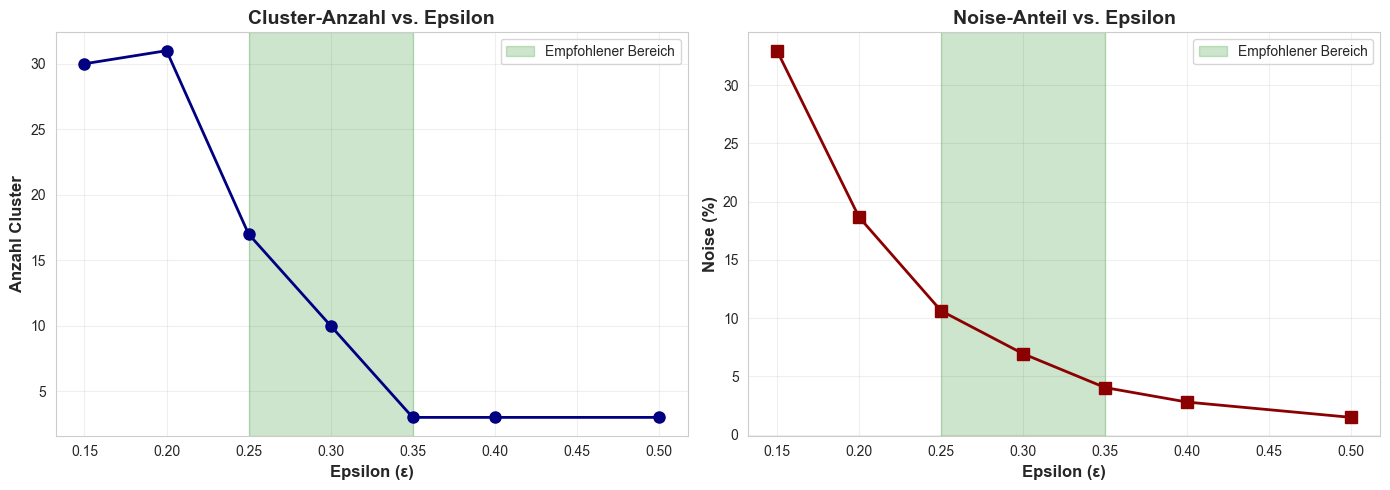


Plot gespeichert: 06_epsilon_analysis.png

EMPFEHLUNG:
Basierend auf der Analyse empfehle ich:
  -> ε = 0.30 oder ε = 0.35
  -> Guter Kompromiss zwischen Cluster-Anzahl und Noise
  -> 3-5 Cluster sind typisch für RFM-Segmentierung


In [18]:
from sklearn.cluster import cluster_optics_dbscan

print("=" * 60)
print("PHASE 3 - SCHRITT 3: CLUSTER EXTRAKTION")
print("=" * 60)

print("\nSchaue auf den Reachability Plot!")
print("Basierend auf den Statistiken empfehlen wir:")
print(f"  - 75% Perzentil: ε = 0.18")
print(f"  - 95% Perzentil: ε = 0.33")
print(f"  - Median: ε = 0.11")

print("\nWir testen verschiedene epsilon-Werte:")

# Verschiedene epsilon-Werte testen
epsilon_values = [0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.50]

results = []

for eps in epsilon_values:
    # Cluster mit epsilon extrahieren
    labels_eps = cluster_optics_dbscan(
        reachability=optics_model.reachability_,
        core_distances=optics_model.core_distances_,
        ordering=optics_model.ordering_,
        eps=eps
    )
    
    # Statistiken berechnen
    unique_labels = np.unique(labels_eps)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = np.sum(labels_eps == -1)
    noise_pct = n_noise / len(labels_eps) * 100
    
    results.append({
        'epsilon': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'noise_pct': noise_pct
    })
    
    print(f"\nε = {eps:.2f}:")
    print(f"  - Cluster: {n_clusters}")
    print(f"  - Noise: {n_noise} ({noise_pct:.1f}%)")

# Ergebnisse als DataFrame
results_df = pd.DataFrame(results)

print("\n" + "=" * 60)
print("ÜBERSICHT ALLER TESTS:")
print("=" * 60)
print(results_df.to_string(index=False))

# Visualisierung der Ergebnisse
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Anzahl Cluster vs epsilon
axes[0].plot(results_df['epsilon'], results_df['n_clusters'], 
             marker='o', linewidth=2, markersize=8, color='navy')
axes[0].set_xlabel('Epsilon (ε)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Anzahl Cluster', fontsize=12, fontweight='bold')
axes[0].set_title('Cluster-Anzahl vs. Epsilon', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Noise % vs epsilon
axes[1].plot(results_df['epsilon'], results_df['noise_pct'], 
             marker='s', linewidth=2, markersize=8, color='darkred')
axes[1].set_xlabel('Epsilon (ε)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Noise (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Noise-Anteil vs. Epsilon', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Markiere empfohlenen Bereich
for ax in axes:
    ax.axvspan(0.25, 0.35, alpha=0.2, color='green', label='Empfohlener Bereich')
    ax.legend()

plt.tight_layout()
plt.savefig('../results/figures/06_epsilon_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert: 06_epsilon_analysis.png")

print("\n" + "=" * 60)
print("EMPFEHLUNG:")
print("=" * 60)
print("Basierend auf der Analyse empfehle ich:")
print("  -> ε = 0.30 oder ε = 0.35")
print("  -> Guter Kompromiss zwischen Cluster-Anzahl und Noise")
print("  -> 3-5 Cluster sind typisch für RFM-Segmentierung")

PHASE 4: CLUSTER EVALUATION & ANALYSE

Extrahiere Cluster mit ε = 0.35

SCHRITT 1 & 2: CLUSTER-LABELS & STATISTIKEN

Cluster erfolgreich zugewiesen!
  - Anzahl Cluster: 3
  - Anzahl Noise-Punkte: 175 (4.0%)

Cluster-Größen:
  Noise (Cluster -1): 175 Kunden (4.0%)
  Cluster 0: 1878 Kunden (43.3%)
  Cluster 1: 1464 Kunden (33.7%)
  Cluster 2: 821 Kunden (18.9%)

SCHRITT 3: SILHOUETTE SCORE
Silhouette Score: 0.175
   (Bereich: -1 bis +1, höher = besser)
   → Cluster überlappen stark

SCHRITT 4: RFM-PROFILE PRO CLUSTER

CLUSTER-PROFILE (Detailliert):
         Recency_mean  Recency_median  Recency_min  Recency_max  \
Cluster                                                           
-1              59.91            18.0            1          372   
 0              43.64            24.0            1          334   
 1             158.02           134.0            1          374   
 2              94.57            63.0            1          373   

         Frequency_mean  Frequency_median  F

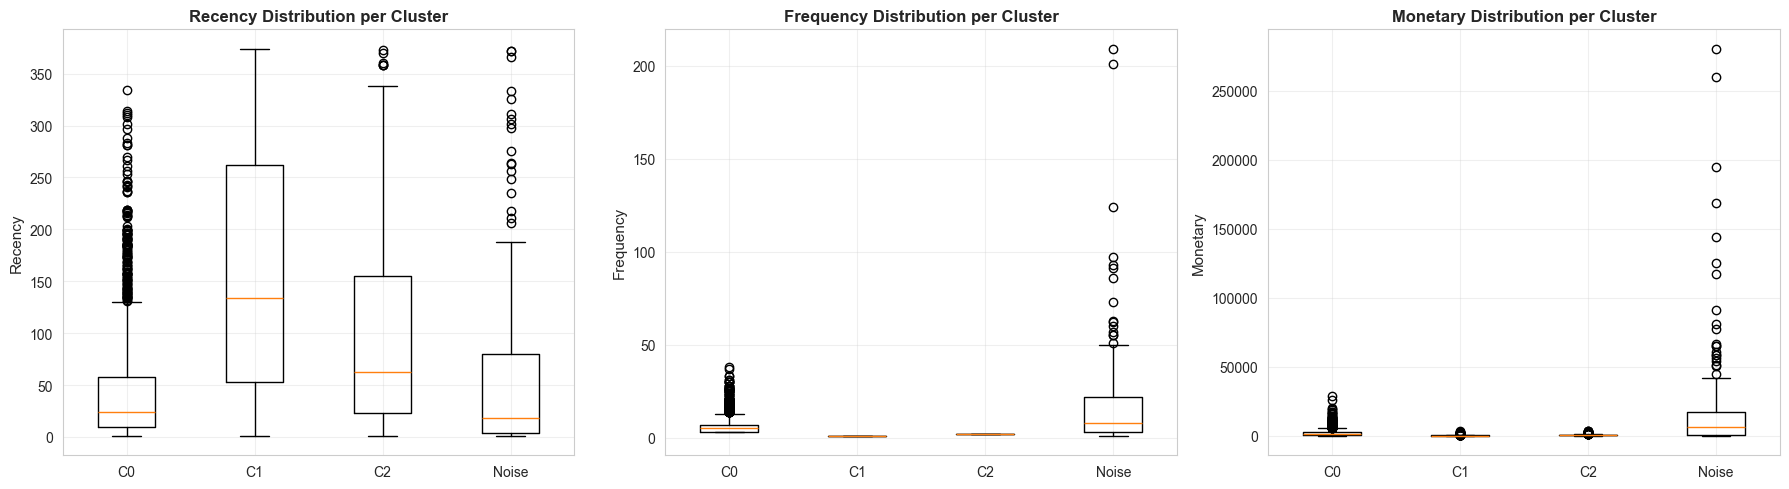


Plot gespeichert: 07_cluster_profiles_boxplot.png


In [20]:
print("=" * 60)
print("PHASE 4: CLUSTER EVALUATION & ANALYSE")
print("=" * 60)

# Finale Cluster-Extraktion mit ε = 0.35
epsilon_final = 0.35

print(f"\nExtrahiere Cluster mit ε = {epsilon_final}")

# Labels extrahieren
labels_final = cluster_optics_dbscan(
    reachability=optics_model.reachability_,
    core_distances=optics_model.core_distances_,
    ordering=optics_model.ordering_,
    eps=epsilon_final
)

# Zu DataFrame hinzufügen
rfm['Cluster'] = labels_final

print("\n" + "=" * 60)
print("SCHRITT 1 & 2: CLUSTER-LABELS & STATISTIKEN")
print("=" * 60)

# Cluster-Statistiken
unique_labels = np.unique(labels_final)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = np.sum(labels_final == -1)

print(f"\nCluster erfolgreich zugewiesen!")
print(f"  - Anzahl Cluster: {n_clusters}")
print(f"  - Anzahl Noise-Punkte: {n_noise} ({n_noise/len(labels_final)*100:.1f}%)")

# Cluster-Größen
print("\nCluster-Größen:")
for label in sorted(unique_labels):
    count = np.sum(labels_final == label)
    if label == -1:
        print(f"  Noise (Cluster -1): {count} Kunden ({count/len(labels_final)*100:.1f}%)")
    else:
        print(f"  Cluster {label}: {count} Kunden ({count/len(labels_final)*100:.1f}%)")

# Silhouette Score berechnen (nur für nicht-Noise Punkte)
print("\n" + "=" * 60)
print("SCHRITT 3: SILHOUETTE SCORE")
print("=" * 60)

from sklearn.metrics import silhouette_score, silhouette_samples

# Nur Cluster-Punkte (kein Noise)
mask_no_noise = labels_final != -1
if np.sum(mask_no_noise) > 0 and n_clusters > 1:
    silhouette_avg = silhouette_score(
        rfm_scaled_df[mask_no_noise], 
        labels_final[mask_no_noise]
    )
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    print(f"   (Bereich: -1 bis +1, höher = besser)")
    
    if silhouette_avg > 0.5:
        print("   → SEHR GUT! Cluster sind gut separiert")
    elif silhouette_avg > 0.3:
        print("   → GUT! Cluster sind klar erkennbar")
    elif silhouette_avg > 0.2:
        print("   → AKZEPTABEL! Cluster überlappen etwas")
    else:
        print("   → Cluster überlappen stark")
else:
    print("Silhouette Score nicht berechenbar (zu wenig Cluster)")

# RFM-Profile pro Cluster
print("\n" + "=" * 60)
print("SCHRITT 4: RFM-PROFILE PRO CLUSTER")
print("=" * 60)

# Cluster-Profile erstellen
cluster_profiles = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Monetary': ['mean', 'median', 'min', 'max'],
    'CustomerID': 'count'
}).round(2)

cluster_profiles.columns = ['_'.join(col).strip() for col in cluster_profiles.columns.values]
cluster_profiles = cluster_profiles.rename(columns={'CustomerID_count': 'Anzahl_Kunden'})

print("\nCLUSTER-PROFILE (Detailliert):")
print("=" * 80)
print(cluster_profiles)

# Vereinfachte Übersicht (nur Mittelwerte)
print("\n" + "=" * 60)
print("CLUSTER-PROFILE (Mittelwerte - Übersicht)")
print("=" * 60)

cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).round(2)

cluster_summary.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Anzahl_Kunden']
print(cluster_summary)

# Visualisierung der Cluster-Profile
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    # Boxplots pro Cluster
    data_to_plot = []
    labels_to_plot = []
    
    for label in sorted(unique_labels):
        if label != -1:  # Ohne Noise
            data_to_plot.append(rfm[rfm['Cluster'] == label][feature])
            labels_to_plot.append(f'C{label}')
    
    # Noise separat
    if n_noise > 0:
        data_to_plot.append(rfm[rfm['Cluster'] == -1][feature])
        labels_to_plot.append('Noise')
    
    axes[idx].boxplot(data_to_plot, labels=labels_to_plot)
    axes[idx].set_title(f'{feature} Distribution per Cluster', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=11)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/07_cluster_profiles_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert: 07_cluster_profiles_boxplot.png")

PHASE 5: CLUSTER INTERPRETATION & VISUALISIERUNG

SCHRITT 1: CLUSTER BENENNEN
------------------------------------------------------------

Cluster-Namen zugewiesen:
  Cluster -1: VIP & Großhändler (Noise)
             → 175 Kunden (4.0%)
  Cluster  0: Champions (Beste Kunden)
             → 1878 Kunden (43.3%)
  Cluster  1: Verlorene Kunden (At Risk)
             → 1464 Kunden (33.7%)
  Cluster  2: Potenzial-Kunden (Developing)
             → 821 Kunden (18.9%)

SCHRITT 2: NOISE-ANALYSE (Ausreißer-Kunden)

175 Ausreißer-Kunden gefunden:

Top 10 nach Monetary (Umsatz):
------------------------------------------------------------
 CustomerID  Recency  Frequency  Monetary
    14646.0        2         73 280206.02
    18102.0        1         60 259657.30
    17450.0        8         46 194390.79
    16446.0        1          2 168472.50
    14911.0        1        201 143711.17
    12415.0       24         21 124914.53
    14156.0       10         55 117210.08
    17511.0        3       

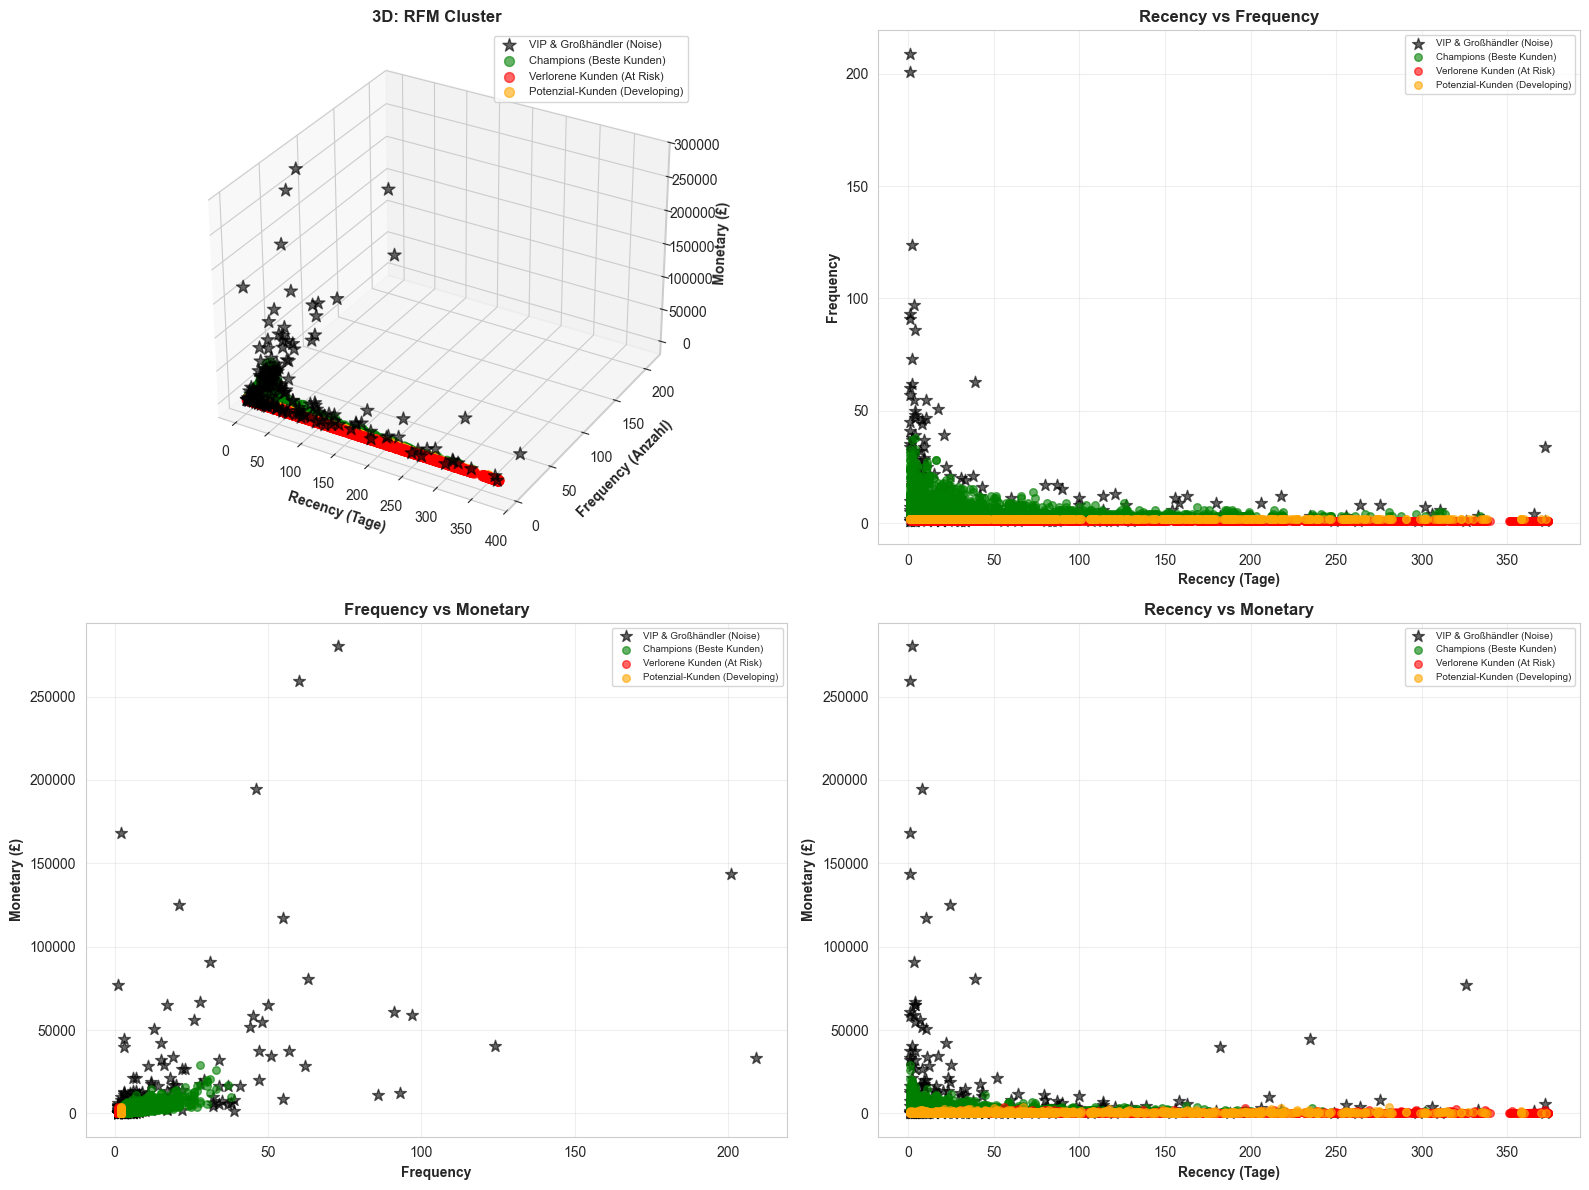


Plot gespeichert: 08_cluster_visualization_3d.png


In [21]:
print("=" * 60)
print("PHASE 5: CLUSTER INTERPRETATION & VISUALISIERUNG")
print("=" * 60)

# SCHRITT 1: Cluster benennen
print("\nSCHRITT 1: CLUSTER BENENNEN")
print("-" * 60)

cluster_names = {
    -1: 'VIP & Großhändler (Noise)',
    0: 'Champions (Beste Kunden)',
    1: 'Verlorene Kunden (At Risk)',
    2: 'Potenzial-Kunden (Developing)'
}

# Namen zur DataFrame hinzufügen
rfm['Segment_Name'] = rfm['Cluster'].map(cluster_names)

print("\nCluster-Namen zugewiesen:")
for cluster_id, name in cluster_names.items():
    count = np.sum(rfm['Cluster'] == cluster_id)
    print(f"  Cluster {cluster_id:2d}: {name}")
    print(f"             → {count} Kunden ({count/len(rfm)*100:.1f}%)")

# SCHRITT 2: Noise-Analyse
print("\n" + "=" * 60)
print("SCHRITT 2: NOISE-ANALYSE (Ausreißer-Kunden)")
print("=" * 60)

noise_customers = rfm[rfm['Cluster'] == -1].copy()

if len(noise_customers) > 0:
    print(f"\n{len(noise_customers)} Ausreißer-Kunden gefunden:")
    print("\nTop 10 nach Monetary (Umsatz):")
    print("-" * 60)
    top_noise = noise_customers.nlargest(10, 'Monetary')[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
    print(top_noise.to_string(index=False))
    
    print("\nTop 10 nach Frequency (Bestellungen):")
    print("-" * 60)
    top_freq = noise_customers.nlargest(10, 'Frequency')[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
    print(top_freq.to_string(index=False))
    
    print("\nINTERPRETATION:")
    print("  → Sehr hohe Frequency/Monetary = VIP-Kunden oder B2B")
    print("  → Diese Kunden verdienen spezielle Aufmerksamkeit!")
    print("  → Separate Marketing-Strategie empfohlen")

# SCHRITT 3: 3D-Visualisierung
print("\n" + "=" * 60)
print("SCHRITT 3: 3D-VISUALISIERUNG")
print("=" * 60)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))

# 3D Plot
ax1 = fig.add_subplot(221, projection='3d')

# Farben für Cluster
colors_map = {
    -1: 'black',
    0: 'green',
    1: 'red',
    2: 'orange'
}

for cluster_id in sorted(rfm['Cluster'].unique()):
    cluster_data = rfm[rfm['Cluster'] == cluster_id]
    ax1.scatter(
        cluster_data['Recency'],
        cluster_data['Frequency'],
        cluster_data['Monetary'],
        c=colors_map[cluster_id],
        label=cluster_names[cluster_id],
        alpha=0.6,
        s=50 if cluster_id != -1 else 100,
        marker='o' if cluster_id != -1 else '*'
    )

ax1.set_xlabel('Recency (Tage)', fontsize=10, fontweight='bold')
ax1.set_ylabel('Frequency (Anzahl)', fontsize=10, fontweight='bold')
ax1.set_zlabel('Monetary (£)', fontsize=10, fontweight='bold')
ax1.set_title('3D: RFM Cluster', fontsize=12, fontweight='bold')
ax1.legend(fontsize=8)

# 2D Plots
# Recency vs Frequency
ax2 = fig.add_subplot(222)
for cluster_id in sorted(rfm['Cluster'].unique()):
    cluster_data = rfm[rfm['Cluster'] == cluster_id]
    ax2.scatter(
        cluster_data['Recency'],
        cluster_data['Frequency'],
        c=colors_map[cluster_id],
        label=cluster_names[cluster_id],
        alpha=0.6,
        s=30 if cluster_id != -1 else 80,
        marker='o' if cluster_id != -1 else '*'
    )
ax2.set_xlabel('Recency (Tage)', fontsize=10, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax2.set_title('Recency vs Frequency', fontsize=12, fontweight='bold')
ax2.legend(fontsize=7)
ax2.grid(True, alpha=0.3)

# Frequency vs Monetary
ax3 = fig.add_subplot(223)
for cluster_id in sorted(rfm['Cluster'].unique()):
    cluster_data = rfm[rfm['Cluster'] == cluster_id]
    ax3.scatter(
        cluster_data['Frequency'],
        cluster_data['Monetary'],
        c=colors_map[cluster_id],
        label=cluster_names[cluster_id],
        alpha=0.6,
        s=30 if cluster_id != -1 else 80,
        marker='o' if cluster_id != -1 else '*'
    )
ax3.set_xlabel('Frequency', fontsize=10, fontweight='bold')
ax3.set_ylabel('Monetary (£)', fontsize=10, fontweight='bold')
ax3.set_title('Frequency vs Monetary', fontsize=12, fontweight='bold')
ax3.legend(fontsize=7)
ax3.grid(True, alpha=0.3)

# Recency vs Monetary
ax4 = fig.add_subplot(224)
for cluster_id in sorted(rfm['Cluster'].unique()):
    cluster_data = rfm[rfm['Cluster'] == cluster_id]
    ax4.scatter(
        cluster_data['Recency'],
        cluster_data['Monetary'],
        c=colors_map[cluster_id],
        label=cluster_names[cluster_id],
        alpha=0.6,
        s=30 if cluster_id != -1 else 80,
        marker='o' if cluster_id != -1 else '*'
    )
ax4.set_xlabel('Recency (Tage)', fontsize=10, fontweight='bold')
ax4.set_ylabel('Monetary (£)', fontsize=10, fontweight='bold')
ax4.set_title('Recency vs Monetary', fontsize=12, fontweight='bold')
ax4.legend(fontsize=7)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/08_cluster_visualization_3d.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlot gespeichert: 08_cluster_visualization_3d.png")

In [24]:
print("=" * 60)
print("PHASE 6: ERGEBNISSE EXPORTIEREN")
print("=" * 60)

# SCHRITT 1: Kundensegmente mit Labels speichern
print("\nSCHRITT 1: Kundensegmente exportieren")
print("-" * 60)

# Erstelle finalen Export-DataFrame
customer_segments = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 
                         'Cluster', 'Segment_Name']].copy()

# Sortiere nach Cluster
customer_segments = customer_segments.sort_values(['Cluster', 'Monetary'], 
                                                   ascending=[True, False])

# Speichern
customer_segments.to_csv('../results/customer_segments_optics.csv', index=False)
print(f"Gespeichert: customer_segments_optics.csv")
print(f"   -> {len(customer_segments)} Kunden mit Segment-Zuordnung")

# SCHRITT 2: Cluster-Summary erstellen
print("\n SCHRITT 2: Cluster-Summary exportieren")
print("-" * 60)

cluster_summary = rfm.groupby(['Cluster', 'Segment_Name']).agg({
    'CustomerID': 'count',
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'sum']
}).round(2)

# Flache Spalten
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary = cluster_summary.reset_index()

# Umbenennen
cluster_summary = cluster_summary.rename(columns={
    'CustomerID_count': 'Anzahl_Kunden',
    'Recency_mean': 'Avg_Recency',
    'Recency_median': 'Median_Recency',
    'Frequency_mean': 'Avg_Frequency',
    'Frequency_median': 'Median_Frequency',
    'Monetary_mean': 'Avg_Monetary',
    'Monetary_median': 'Median_Monetary',
    'Monetary_sum': 'Total_Revenue'
})

# Anteil berechnen
cluster_summary['Anteil_%'] = (cluster_summary['Anzahl_Kunden'] / len(rfm) * 100).round(1)

# Sortieren nach Cluster
cluster_summary = cluster_summary.sort_values('Cluster')

print(cluster_summary.to_string(index=False))

# Speichern
cluster_summary.to_csv('../results/cluster_summary_optics.csv', index=False)
print(f"\nGespeichert: cluster_summary_optics.csv")

# SCHRITT 3: Noise-Kunden separat exportieren
print("\nSCHRITT 3: Noise-Kunden (VIPs) separat exportieren")
print("-" * 60)

noise_export = rfm[rfm['Cluster'] == -1][['CustomerID', 'Recency', 'Frequency', 
                                           'Monetary', 'Segment_Name']].copy()
noise_export = noise_export.sort_values('Monetary', ascending=False)

noise_export.to_csv('../results/noise_customers_optics.csv', index=False)
print(f"Gespeichert: noise_customers_optics.csv")
print(f"   → {len(noise_export)} VIP/Großhändler-Kunden")

# SCHRITT 4: Final Summary
print("\n" + "=" * 60)
print(" OPTICS CLUSTERING ABGESCHLOSSEN!")
print("=" * 60)

print("\n ZUSAMMENFASSUNG:")
print("-" * 60)
print(f"Gesamtkunden analysiert: {len(rfm)}")
print(f"Anzahl Cluster: 3 + 1 Noise-Segment")
print(f"Epsilon verwendet: {epsilon_final}")
print(f"min_samples: {min_samples}")

print("\n EXPORTIERTE DATEIEN:")
print("-" * 60)
print("customer_segments_optics.csv    - Alle Kunden mit Segment")
print("cluster_summary_optics.csv      - Cluster-Statistiken")
print("noise_customers_optics.csv      - VIP/Ausreißer separat")

print("\n ERSTELLTE VISUALISIERUNGEN:")
print("-" * 60)
print(" 01_rfm_distributions.png        - RFM Verteilungen")
print(" 02_rfm_correlation.png          - Korrelationsmatrix")
print(" 03_transformation_comparison.png - Vor/Nach Transformation")
print(" 04_k_distance_plot.png          - K-Distanz für eps")
print(" 05_optics_reachability_plot.png - Reachability Plot ")
print(" 06_epsilon_analysis.png         - Epsilon-Optimierung")
print(" 07_cluster_profiles_boxplot.png - Cluster-Profile")
print(" 08_cluster_visualization_3d.png - 3D/2D Visualisierung")

print("\n MARKETING EMPFEHLUNGEN:")
print("-" * 60)
print("Champions (43.3%)")
print("   -> Loyalitätsprogramme, exklusive Angebote")
print("\nVerlorene Kunden (33.7%)")
print("   -> Re-Aktivierungs-Kampagnen, Win-Back Angebote")
print("\nPotenzial-Kunden (18.9%)")
print("   -> Upselling, Cross-Selling, Engagement-Kampagnen")
print("\nVIP & Großhändler (4.0%)")
print("   -> Persönliche Betreuung, B2B-Strategien")

print("\n" + "=" * 60)
print("ALLE PHASEN ERFOLGREICH ABGESCHLOSSEN!")
print("=" * 60)

PHASE 6: ERGEBNISSE EXPORTIEREN

SCHRITT 1: Kundensegmente exportieren
------------------------------------------------------------
Gespeichert: customer_segments_optics.csv
   -> 4338 Kunden mit Segment-Zuordnung

 SCHRITT 2: Cluster-Summary exportieren
------------------------------------------------------------
 Cluster                  Segment_Name  Anzahl_Kunden  Avg_Recency  Median_Recency  Avg_Frequency  Median_Frequency  Avg_Monetary  Median_Monetary  Total_Revenue  Anteil_%
      -1     VIP & Großhändler (Noise)            175        59.91            18.0          18.69               8.0      19759.54          6281.23     3457919.18       4.0
       0      Champions (Beste Kunden)           1878        43.64            24.0           6.47               5.0       2342.25          1595.46     4398743.97      43.3
       1    Verlorene Kunden (At Risk)           1464       158.02           134.0           1.00               1.0        342.39           256.01      501254.71      3